<a href="https://colab.research.google.com/github/pedrolira10/MVP-Analise-de-Dados-e-Boas-Praticas/blob/main/MVP_AnaliseDBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= LightSeaGreen> MVP Análise de Dados e Boas Práticas
Nome: Pedro Lira de Castro

Matrícula: 4052024001354

Dataset: [Loans and Liability](https://www.kaggle.com/datasets/matinmahmoudi/loans-and-liability?select=LoanData_Raw_v1.0.csv)

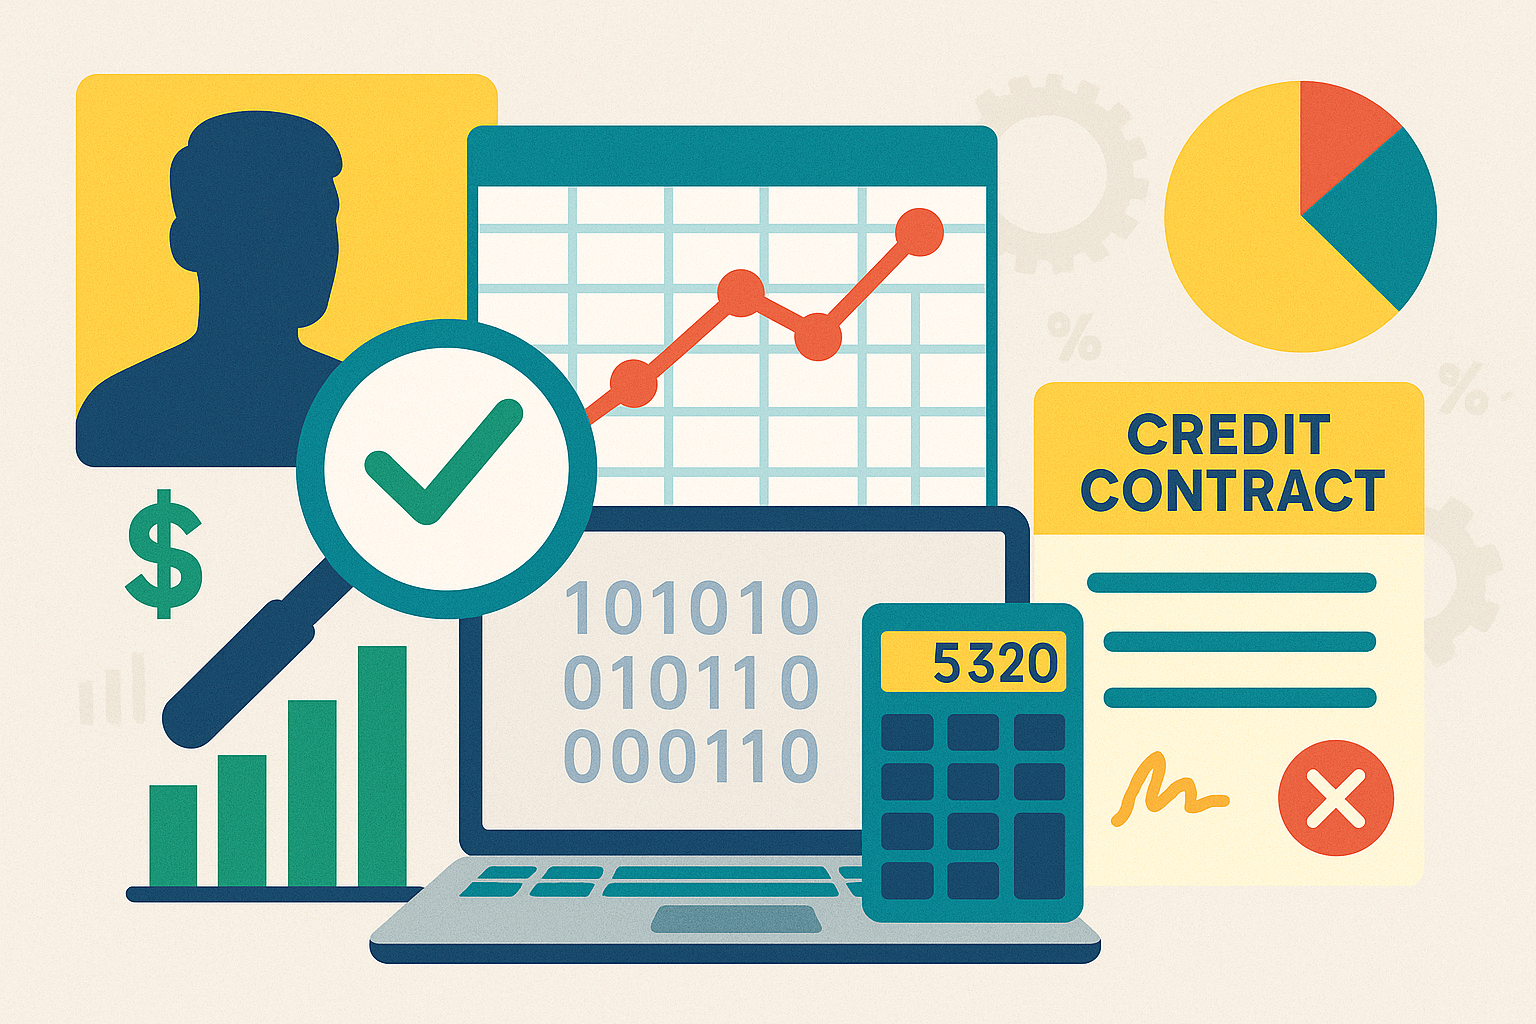

#Descrição do Problema

O conjunto de dados "Loans and Liability" foi criado para classificar e prever a adimplência (0) ou inadimplência (1) em contratos de crédito. Ele engloba um conjunto diversificado de informações sobre solicitantes de empréstimos, incluindo idade, escolaridade, tempo de emprego, tempo de residência, renda anual, endividamento, dívida de cartão de crédito e outras dívidas. O principal objetivo é utilizar esses dados para desenvolver modelos de machine learning que consigam avaliar o risco de crédito de um indivíduo, determinando se ele é um pagador confiável ou se apresenta alta probabilidade de inadimplir.

##Hipóteses do Problema

As hipóteses que tracei são as seguintes:
* O nível de endividamento e a renda anual são os fatores mais preditivos de inadimplência?
* O conjunto de dados apresenta um desequilíbrio entre as classes "adimplente" e "inadimplente"?
* Solicitantes mais jovens apresentam maior proporção de inadimplência do que os mais velhos?

##Tipo de Problema

Este é um problema de classificação supervisionada. Dado um conjunto de características dos solicitantes de empréstimo (idade, escolaridade, tempo de emprego, tempo de residência, renda anual, endividamento, dívida de cartão de crédito e outras dívidas), o objetivo é prever se o solicitante irá adimplir (0) ou inadimplir (1) em seus contratos de crédito.

##Seleção de Dados

O conjunto de dados foi obtido no site do Kaggle, exigiu uma etapa de seleção de dados. Esta etapa foi fundamental para garantir a qualidade e a adequação do conjunto de dados. Especificamente, foi necessário realizar o tratamento de valores nulos para preencher dados ausentes, e o tratamento de outliers para identificar e gerenciar valores extremos que poderiam distorcer o aprendizado do algoritmo. Além disso, considerando a hipótese de desequilíbrio entre as classes utilizei técnicas de balanceamento.

##Atributos do Dataset

* ***idade***: Idade do solicitante do empréstimo / Tipo de Dado: Numérico
* ***escolaridade***: Nível mais alto de escolaridade atingido pelo solicitante / Categorias: Ensino Médio, Graduação, Pós-graduação, Doutorado/Pós-doutorado / Tipo de Dado: Numérico
* ***tempo_empregado***: Número de anos que o solicitante está empregado / Tipo de Dado: Numérico
* ***tempo_residencia***: Número de anos que o solicitante vive no endereço atual / Tipo de Dado: Numérico
* ***renda_anual***: Renda anual do solicitante em milhares de dólares / Tipo de Dado: Numérico
* ***endividamento***: Razão entre o total dos pagamentos mensais de dívidas do solicitante e sua renda bruta mensal / Tipo de Dado: Numérico
* ***divida_cartao***: Valor da dívida de cartão de crédito do solicitante / Tipo de Dado: Numérico
* ***outras_dividas***: Valor de outras dívidas do solicitante / Tipo de Dado: Numérico
* ***inadimplente***: Indica se o solicitante inadimpliu um empréstimo / Categorias: Sim, Não /  Tipo de Dado: Numérico









#Importação das Bibliotecas Necessárias e Carga de Dados
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

O arquivo CSV é baixado de um URL no GitHub, posteriormente os dados são carregados em um DataFrame, atribuindo nomes de colunas específicos ('idade', 'escolaridade', etc.) para facilitar a compressão, por fim, é exibido as primeiras cinco linhas do DataFrame para uma visualização inicial.

In [183]:
url = "https://raw.githubusercontent.com/pedrolira10/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/LoanData_Raw_v1.0.csv"

labels_atributos = ['idade', 'escolaridade', 'tempo_empregado', 'tempo_residencia',
                    'renda_anual', 'endividamento', 'divida_cartao',
                    'outras_dividas', 'inadimplente']


df = pd.read_csv(url, header=0, names=labels_atributos)

df.head(10)

idade  escolaridade  tempo_empregado  tempo_residencia  renda_anual  \
0   41.0           3.0               17                12        176.0   
1   27.0           1.0               10                 6         31.0   
2   40.0           1.0               15                 7          NaN   
3   41.0           NaN               15                14        120.0   
4   24.0           2.0                2                 0         28.0   
5   41.0           2.0                5                 5         25.0   
6   39.0           1.0               20                 9          NaN   
7    NaN           1.0               12                11         38.0   
8   24.0           1.0                3                 4         19.0   
9   36.0           1.0                0                13         25.0   

   endividamento  divida_cartao  outras_dividas inadimplente  
0            9.3      11.359392        5.008608            1  
1           17.3       1.362202        4.000798            0  
2            5.5       0.856075        2.168925            0  
3            2.9       2.658720        0.821280            0  
4           17.3       1.787436        3.056564            1  
5           10.2       0.392700        2.157300            0  
6           30.6       3.833874       16.668126            0  
7            3.6       0.128592        1.239408            0  
8           24.4       1.358348        3.277652            1  
9           19.7       2.777700        2.147300            0

Exibição mais completa do DataFrame.


In [184]:
display(df)

idade  escolaridade  tempo_empregado  tempo_residencia  renda_anual  \
0     41.0           3.0               17                12        176.0   
1     27.0           1.0               10                 6         31.0   
2     40.0           1.0               15                 7          NaN   
3     41.0           NaN               15                14        120.0   
4     24.0           2.0                2                 0         28.0   
..     ...           ...              ...               ...          ...   
695   36.0           2.0                6                15         27.0   
696   29.0           2.0                6                 4         21.0   
697   33.0           1.0               15                 3         32.0   
698   45.0           1.0               19                22         77.0   
699   37.0           1.0               12                14          NaN   

     endividamento  divida_cartao  outras_dividas inadimplente  
0              9.3      11.359392        5.008608            1  
1             17.3       1.362202        4.000798            0  
2              5.5       0.856075        2.168925            0  
3              2.9       2.658720        0.821280            0  
4             17.3       1.787436        3.056564            1  
..             ...            ...             ...          ...  
695            4.6       0.262062        0.979938            1  
696           11.5       0.369495        2.045505            0  
697            7.6       0.491264        1.940736            0  
698            8.4       2.302608        4.165392            0  
699           14.7       2.994684        3.473316            0  

[700 rows x 9 columns]

#Análise de Dados
Análise Exploratória de Dados (EDA), busca entender bem cada parte dos dados. Analisando a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.


## Total e Tipo das Instâncias
O dataset possui 700 registros com 9 variáveis, onde a maioria é numérica, algumas são inteiras, e há ausências significativas nas colunas 'idade', 'escolaridade' e 'renda_anual' que precisarão de tratamento.


In [185]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 700

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             681 non-null    float64
 1   escolaridade      680 non-null    float64
 2   tempo_empregado   700 non-null    int64  
 3   tempo_residencia  700 non-null    int64  
 4   renda_anual       663 non-null    float64
 5   endividamento     700 non-null    float64
 6   divida_cartao     700 non-null    float64
 7   outras_dividas    700 non-null    float64
 8   inadimplente      700 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 49.3+ KB
None


Verificando valores nulos.

In [186]:
df.isnull().sum()

idade               19
escolaridade        20
tempo_empregado      0
tempo_residencia     0
renda_anual         37
endividamento        0
divida_cartao        0
outras_dividas       0
inadimplente         0
dtype: int64

Realizei o agrupamento dos dados pelos valores únicos de cada coluna, em seguida, foi realizado a  contagem da frequência de ocorrência de cada um desses valores. Permitindo visualizar a distribuição de cada variável, identificando a predominância de certos categorias valores e revelando a composição interna de cada atributo.

In [187]:
df.groupby(['idade']).size()

idade
20.0      2
21.0     10
22.0     12
23.0     18
24.0     24
25.0     20
26.0     21
27.0     27
28.0     37
29.0     43
30.0     24
31.0     36
32.0     24
33.0     25
34.0     33
35.0     26
36.0     28
37.0     21
38.0     22
39.0     33
40.0     27
41.0     33
42.0     16
43.0     16
44.0      8
45.0     16
46.0     13
47.0     15
48.0     15
49.0      4
50.0      7
51.0      6
52.0      6
53.0      5
54.0      4
55.0      2
56.0      1
136.0     1
dtype: int64

In [188]:
df.groupby(['escolaridade']).size()

escolaridade
1.0    363
2.0    192
3.0     84
4.0     36
5.0      5
dtype: int64

In [189]:
df.groupby(['tempo_empregado']).size()

tempo_empregado
0     62
1     49
2     44
3     42
4     47
5     36
6     46
7     38
8     31
9     45
10    30
11    26
12    30
13    27
14    14
15    19
16    25
17    12
18    17
19    12
20     5
21     8
22    13
23     5
24     4
25     3
26     1
27     2
28     1
29     1
30     2
31     3
dtype: int64

In [190]:
df.groupby(['tempo_residencia']).size()

tempo_residencia
0     50
1     57
2     59
3     48
4     49
5     34
6     43
7     34
8     40
9     39
10    32
11    27
12    20
13    18
14    21
15    16
16    18
17    17
18     9
19    13
20     7
21     9
22     7
23     9
24     3
25     7
26     7
27     3
29     1
31     2
34     1
dtype: int64

In [191]:
df.groupby(['renda_anual']).size()

renda_anual
14.0      6
15.0      8
16.0     15
17.0     13
18.0     21
         ..
234.0     1
242.0     1
249.0     1
253.0     1
446.0     1
Length: 113, dtype: int64

In [192]:
df.groupby(['endividamento']).size()

endividamento
0.4     1
0.6     2
0.7     1
0.8     1
0.9     3
       ..
33.3    1
33.4    1
35.3    1
36.6    1
41.3    1
Length: 231, dtype: int64

In [193]:
df.groupby(['divida_cartao']).size()

divida_cartao
0.011696     1
0.014835     1
0.024528     1
0.024576     1
0.025074     1
            ..
14.596200    1
15.016680    1
15.791776    1
16.031470    1
20.561310    1
Length: 695, dtype: int64

In [194]:
df.groupby(['outras_dividas']).size()

outras_dividas
0.045584     1
0.089488     1
0.100926     1
0.107520     1
0.129582     1
            ..
18.257382    1
18.269130    1
20.615868    1
23.104224    1
27.033600    1
Length: 699, dtype: int64

In [195]:
df.groupby(['inadimplente']).size()

inadimplente
'0'      1
0      515
1      183
:0       1
dtype: int64

Gráfico de barras da variável alvo 'inadimplente' para visualizar a distribuição das suas classes (0 e 1) e verificar o balanceamento entre inadimplentes e não inadimplentes no dataset.

Pode ser analisado um forte desbalanceamento de classes, este desequilíbrio é crítico, pois pode enviesar modelos preditivos, levando a baixa performance na detecção da classe minoritária e exigindo o uso de métricas de avaliação específica e técnicas de tratamento de desbalanceamento.

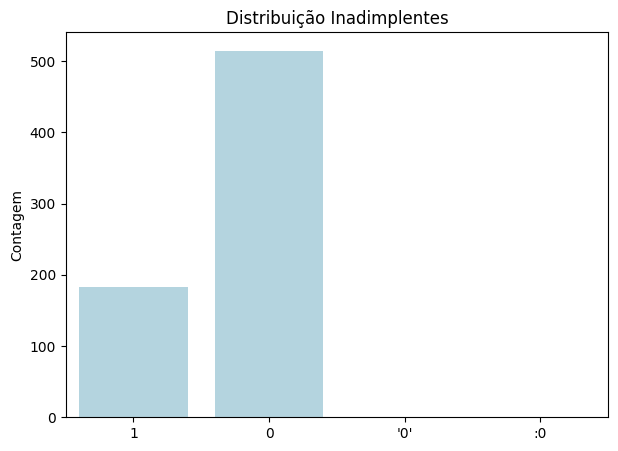

In [196]:
plt.figure(figsize=(7, 5))
sns.countplot(x='inadimplente', data=df, color='lightblue')
plt.title('Distribuição Inadimplentes')
plt.xlabel('')
plt.ylabel('Contagem')
plt.show()

## Estatísticas Descritivas

Sumário estatístico descritivo para as colunas numéricas do DataFrame. Para cada uma dessas colunas, é exibido métricas como a contagem de valores não nulos, média, desvio padrão, valores mínimo e máximo, e os quartis (25%, 50% - mediana, e 75%). Essa função é fundamental na Análise Exploratória de Dados.

In [197]:
df.describe()

idade  escolaridade  tempo_empregado  tempo_residencia  \
count  681.000000    680.000000       700.000000        700.000000   
mean    34.898678      1.717647         8.388571          8.268571   
std      8.861849      0.925652         6.658039          6.821609   
min     20.000000      1.000000         0.000000          0.000000   
25%     28.000000      1.000000         3.000000          3.000000   
50%     34.000000      1.000000         7.000000          7.000000   
75%     40.000000      2.000000        12.000000         12.000000   
max    136.000000      5.000000        31.000000         34.000000   

       renda_anual  endividamento  divida_cartao  outras_dividas  
count    663.00000     700.000000     700.000000      700.000000  
mean      45.74359      10.260571       1.553553        3.058209  
std       37.44108       6.827234       2.117197        3.287555  
min       14.00000       0.400000       0.011696        0.045584  
25%       24.00000       5.000000       0.369059        1.044178  
50%       34.00000       8.600000       0.854869        1.987567  
75%       54.50000      14.125000       1.901955        3.923065  
max      446.00000      41.300000      20.561310       27.033600

###Média

A média aritmética é a medida de tendência central que representa o valor "típico" de um conjunto de dados. É calculada somando-se todos os valores e dividindo pelo total de observações. Essencialmente, é o ponto de equilíbrio dos dados. Contudo, é crucial notar que a média é fortemente influenciada por valores extremos (outliers).

In [198]:
df.describe().loc['mean']

idade               34.898678
escolaridade         1.717647
tempo_empregado      8.388571
tempo_residencia     8.268571
renda_anual         45.743590
endividamento       10.260571
divida_cartao        1.553553
outras_dividas       3.058209
Name: mean, dtype: float64

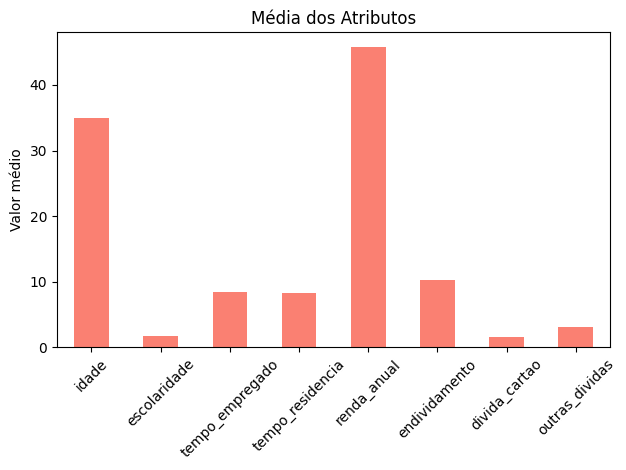

In [199]:
mean_values = df.describe().loc['mean']
mean_values.plot(kind='bar', color='salmon', title='Média dos Atributos')
plt.ylabel('Valor médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica o quanto os dados se afastam, em média, da média aritmética. Ele é calculado como a raiz quadrada da variância. Essencialmente, ele nos diz o grau de variabilidade ou consistência dentro de um conjunto de dados. Um desvio padrão baixo indica que os dados estão próximos da média (pouca dispersão), enquanto um alto desvio padrão significa que os dados estão muito espalhados (muita dispersão).

In [200]:
df.describe().loc['std']

idade                8.861849
escolaridade         0.925652
tempo_empregado      6.658039
tempo_residencia     6.821609
renda_anual         37.441080
endividamento        6.827234
divida_cartao        2.117197
outras_dividas       3.287555
Name: std, dtype: float64

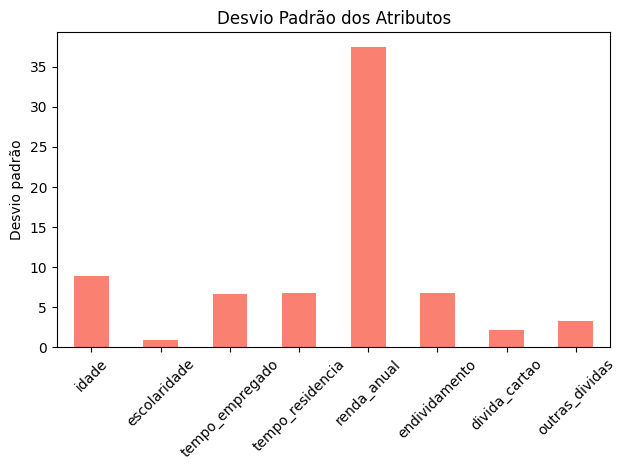

In [201]:
std_values = df.describe().loc['std']
std_values.plot(kind='bar', color='salmon', title='Desvio Padrão dos Atributos')
plt.ylabel('Desvio padrão')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Mediana

A mediana é uma medida de tendência central que representa o valor do meio em um conjunto de dados ordenado. É encontrada organizando-se todos os valores em ordem crescente (ou decrescente) e identificando o ponto que divide a amostra em duas metades iguais: 50% dos dados são menores ou iguais à mediana, e 50% são maiores ou iguais. Essencialmente, é o valor posicional central. Diferentemente da média, a mediana é robusta a valores extremos (outliers), tornando-a uma medida mais representativa em distribuições assimétricas.

In [202]:
df.describe().loc['50%']

idade               34.000000
escolaridade         1.000000
tempo_empregado      7.000000
tempo_residencia     7.000000
renda_anual         34.000000
endividamento        8.600000
divida_cartao        0.854869
outras_dividas       1.987567
Name: 50%, dtype: float64

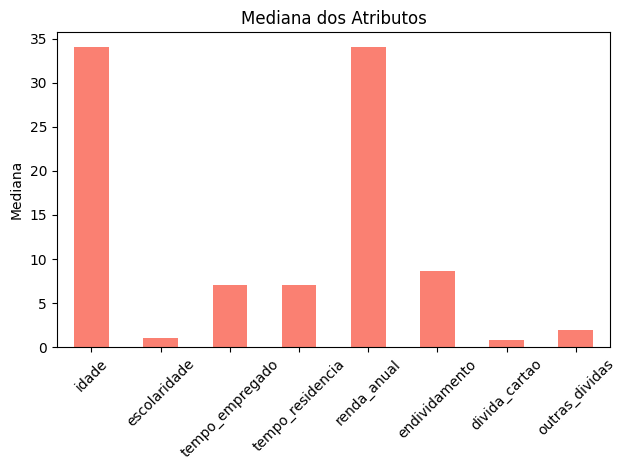

In [203]:
median_values = df.describe().loc['50%']
median_values.plot(kind='bar', color='salmon', title='Mediana dos Atributos')
plt.ylabel('Mediana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histograma

A distribuição de dados é o alicerce para compreender a estrutura e o comportamento de uma variável, descrevendo a frequência com que cada valor ou intervalo de valores ocorre. Sua análise é indispensável na Análise Exploratória de Dados (EDA), pois revela não apenas a tendência central e a dispersão dos valores, mas também a forma da distribuição, a simetria ou assimetria, a presença de múltiplos picos (multimodalidade) e a existência de valores atípicos (outliers). Visualmente, o histograma emerge como a ferramenta primordial para representar essa distribuição, oferecendo uma perspectiva clara sobre os padrões inerentes aos dados.

###Idades

1.	Concentração Principal: A maior concentração de idades está na faixa entre 25 e 45 anos, com um pico notável por volta dos 30-35 anos. Isso indica que a maioria dos solicitantes de empréstimo se enquadra nessa faixa etária.
2.	Distribuição Assimétrica (Enviesada para a Direita): A distribuição das idades é claramente assimétrica, com uma cauda longa se estendendo para a direita. Isso significa que, embora a maioria dos solicitantes seja mais jovem, há um número menor de solicitantes mais velhos, e a frequência diminui à medida que a idade aumenta.
3.	Outlier: A barra isolada e muito baixa por volta dos 140 anos merece atenção. Uma idade de 140 anos é extremamente improvável para um solicitante de empréstimo e pode indicar um outlier que precisaria ser tratado (removido ou corrigido).


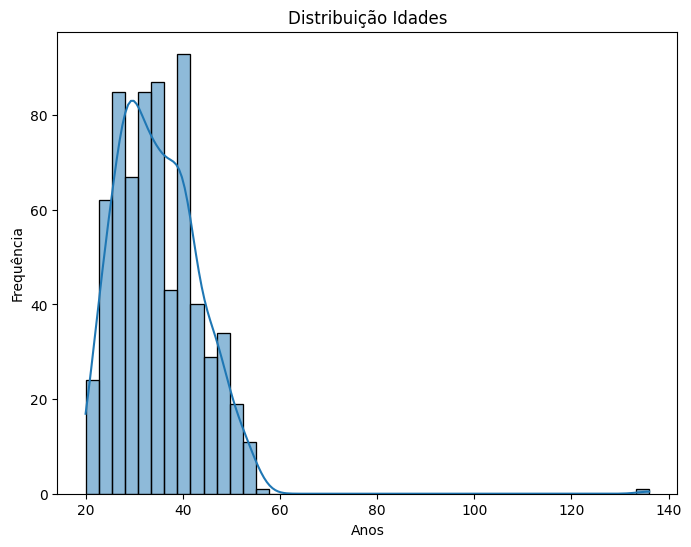

In [204]:
plt.figure(figsize=(8, 6))
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição Idades')
plt.xlabel('Anos')
plt.ylabel('Frequência')
plt.show()

###Escolaridade

1.	Escolaridade Predominante (Nível 1): O nível de escolaridade com a maior frequência é claramente o "1", com mais de 350 ocorrências. Isso sugere que a maior parte dos solicitantes possui o Ensino Médio como o nível de escolaridade.
2.	Segundo Nível Mais Frequente (Nível 2): Apresenta a segunda maior frequência, com aproximadamente 190 ocorrências. Seguindo a mesma lógica, o "Nível 2" corresponde à Graduação. Isso indica que uma parcela significativa dos solicitantes concluiu o ensino superior.
3.	Níveis Superiores de Escolaridade (Níveis 3, 4 e 5):
o	O "Nível 3" (Pós-graduação) mostra uma frequência consideravelmente menor, por volta de 80-90 ocorrências.
o	O "Nível 4" (Doutorado) tem uma frequência ainda menor, abaixo de 50 ocorrências.
o	O "Nível 5" (Pós-doutorado) possui uma frequência muito baixa, quase imperceptível.
4.	Distribuição Assimétrica: A distribuição da escolaridade é altamente assimétrica, concentrada nos níveis mais baixos e diminuindo drasticamente à medida que o nível de escolaridade aumenta. Isso é um padrão comum em populações gerais, onde há mais pessoas com Ensino Médio e Graduação do que com Doutorado.


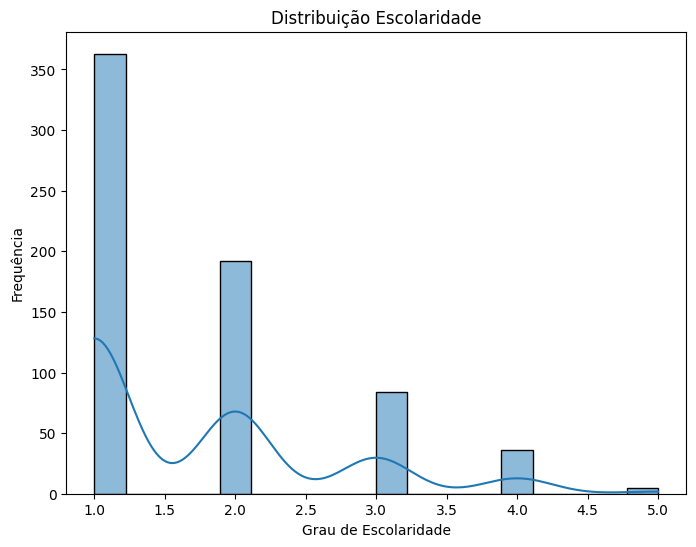

In [205]:
plt.figure(figsize=(8, 6))
sns.histplot(df['escolaridade'], kde=True)
plt.title('Distribuição Escolaridade')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Frequência')
plt.show()

###Tempo Empregado

1.	Concentração no Início: A maior frequência de solicitantes está na faixa de 0 a aproximadamente 2 anos de tempo empregado, com o pico mais alto na barra que representa o tempo mais curto.
2.	Distribuição Assimétrica (Enviesada para a Direita): A distribuição do tempo empregado é nitidamente assimétrica, com uma cauda longa se estendendo para a direita. Isso significa que, embora haja muitos solicitantes com pouco tempo de emprego, a frequência diminui progressivamente à medida que o tempo de emprego aumenta.
3.	Decréscimo Gradual: A frequência de solicitantes diminui de forma constante à medida que o tempo de emprego aumenta. Por exemplo, há menos solicitantes com 5-10 anos de emprego do que com 0-5 anos, e ainda menos com 10-15 anos, e assim por diante.
4.	Longos Períodos de Emprego: Embora em menor número, o gráfico mostra que existem solicitantes com longos períodos de emprego, atingindo até mais de 30 anos. No entanto, a frequência para esses períodos mais longos é muito baixa.
5.	Padrão Comum: Este tipo de distribuição é comum para variáveis como tempo de emprego, onde é natural que haja mais pessoas com menos tempo de casa (novos empregados, transições de carreira) e uma diminuição da quantidade de pessoas conforme a longevidade no emprego aumenta.


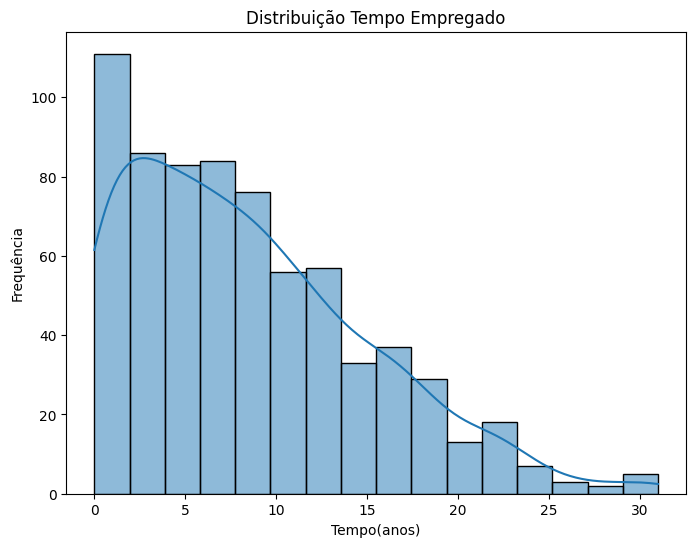

In [206]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tempo_empregado'], kde=True)
plt.title('Distribuição Tempo Empregado')
plt.xlabel('Tempo(anos)')
plt.ylabel('Frequência')
plt.show()

###Tempo Residência

1.	Concentração Inicial: A maior frequência de solicitantes está na faixa de 0 a aproximadamente 5 anos de tempo de residência no endereço atual, com um pico significativo na primeira barra (0 a ~2.5 anos), que mostra mais de 100 ocorrências. Isso indica que uma grande parte dos solicitantes reside em seu endereço atual por um período relativamente curto.
2.	Distribuição Assimétrica (Enviesada para a Direita): A distribuição do tempo de residência é nitidamente assimétrica, com uma cauda longa se estendendo para a direita. Isso significa que, embora haja muitos solicitantes com pouco tempo no endereço atual, a frequência diminui progressivamente à medida que o tempo de residência aumenta.
3.	Decréscimo Gradual: A frequência de solicitantes diminui de forma constante à medida que o tempo de residência aumenta.

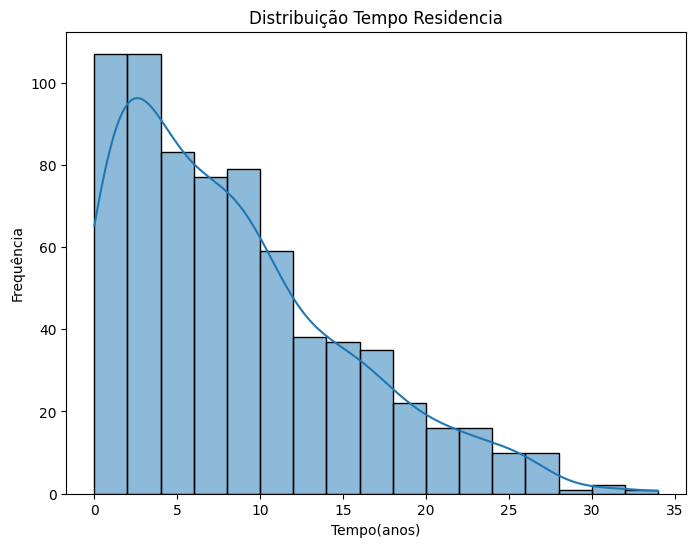

In [207]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tempo_residencia'], kde=True)
plt.title('Distribuição Tempo Residencia')
plt.xlabel('Tempo(anos)')
plt.ylabel('Frequência')
plt.show()

###Renda Anual

1.  Concentração de Rendas Mais Baixas: A maior concentração de solicitantes está na faixa de rendas mais baixas, especificamente entre 0 e aproximadamente 50 mil dólares anuais. O pico mais alto da frequência ocorre na barra inicial, indicando que um grande número de solicitantes possui uma renda anual relativamente baixa.
2.  Distribuição Altamente Assimétrica (Enviesada para a Direita): A distribuição da renda anual é extremamente assimétrica, com uma cauda muito longa e fina se estendendo para a direita. Isso é um padrão clássico para dados de renda, onde a maioria das pessoas se concentra em faixas de renda mais baixas, e um número muito menor de pessoas possui rendas muito altas.
3.  Decréscimo Rápido: A frequência de solicitantes diminui drasticamente à medida que a renda anual aumenta. Há uma queda acentuada após a primeira barra, e a diminuição continua de forma menos íngreme, mas consistente, para rendas mais elevadas.


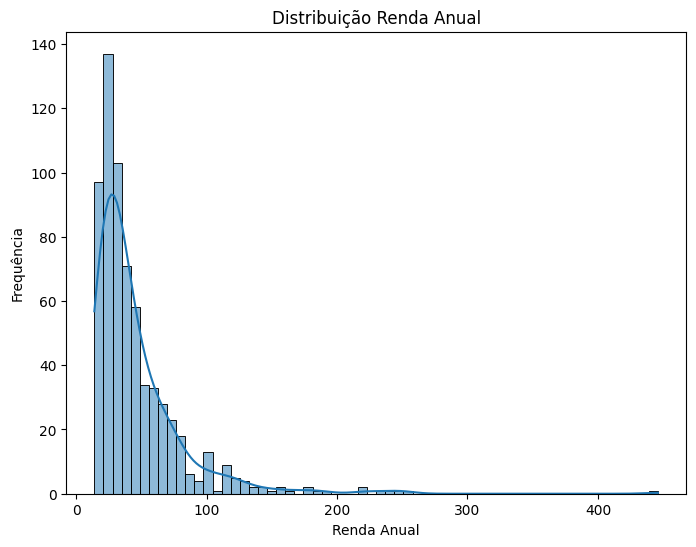

In [208]:
plt.figure(figsize=(8, 6))
sns.histplot(df['renda_anual'], kde=True)
plt.title('Distribuição Renda Anual')
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.show()

###Endividamento

1.	Concentração Principal em Baixo Endividamento: A maior concentração de solicitantes está na faixa de endividamento mais baixa, com um pico proeminente entre aproximadamente 5 e 8. Isso indica que a maior parte dos solicitantes possui um grau de endividamento relativamente baixo.
2.	Distribuição Assimétrica (Enviesada para a Direita): A distribuição do endividamento é assimétrica, com uma cauda se estendendo para a direita. Isso significa que, embora haja muitos solicitantes com baixo endividamento, a frequência diminui progressivamente à medida que o grau de endividamento aumenta.
3.	Decréscimo Gradual: A frequência de solicitantes diminui de forma constante à medida que o grau de endividamento aumenta. Por exemplo, há menos solicitantes com endividamento entre 10 e 15 do que entre 5 e 10, e assim por diante.
4.	Endividamento Elevado: Embora em número muito reduzido, o gráfico mostra que existem alguns solicitantes com graus de endividamento mais elevados, chegando até cerca de 40. No entanto, a frequência para esses graus de endividamento mais altos é muito baixa.


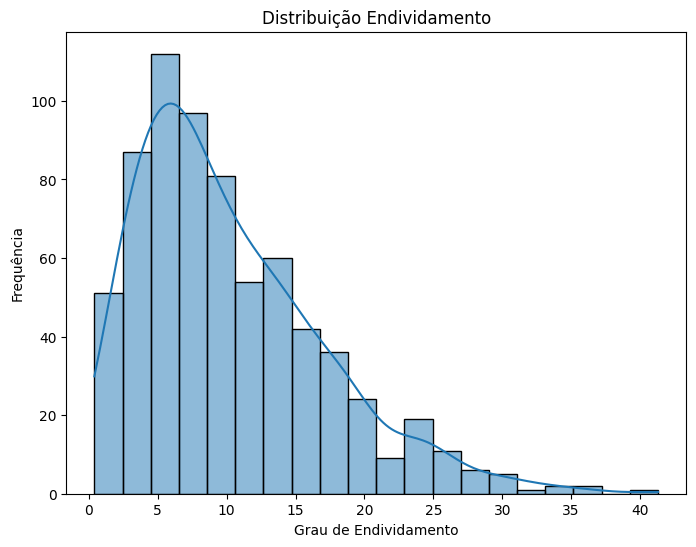

In [209]:
plt.figure(figsize=(8, 6))
sns.histplot(df['endividamento'], kde=True)
plt.title('Distribuição Endividamento')
plt.xlabel('Grau de Endividamento')
plt.ylabel('Frequência')
plt.show()

###Dívida Cartão

1.	Concentração Predominante em Dívidas Baixas/Nulas: A maior concentração de solicitantes está na faixa de dívidas de cartão de crédito muito baixas, com um pico muito pronunciado próximo de 0 (zero) e se estendendo até aproximadamente 1-2. Isso sugere que uma grande maioria dos solicitantes tem pouca ou nenhuma dívida de cartão de crédito.
2.	Distribuição Extremamente Assimétrica (Enviesada para a Direita): A distribuição da dívida de cartão de crédito é altamente assimétrica, com uma cauda muito longa e fina se estendendo para a direita. Isso é um padrão comum para dados de valores financeiros onde a maioria dos valores é baixa, e um número muito menor de casos apresenta valores muito altos.
3.	Decréscimo Acentuado: A frequência de solicitantes diminui drasticamente à medida que o valor da dívida de cartão de crédito aumenta. Após o pico inicial, a queda é muito rápida e contínua.


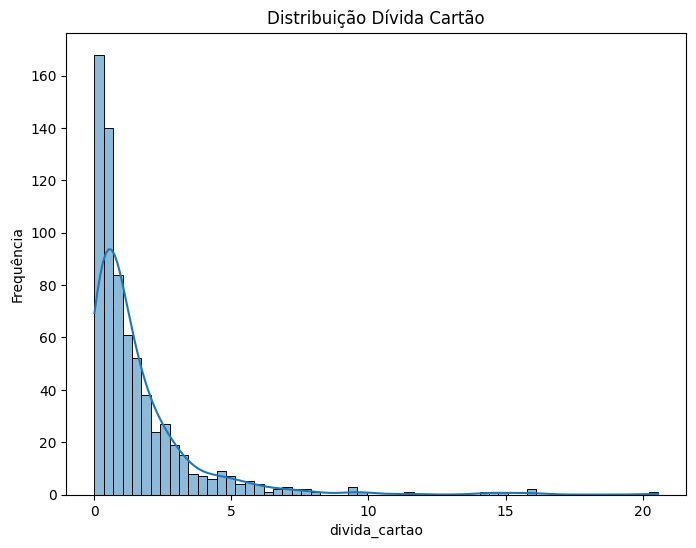

In [210]:
plt.figure(figsize=(8, 6))
sns.histplot(df['divida_cartao'], kde=True)
plt.title('Distribuição Dívida Cartão')
plt.xlabel('divida_cartao')
plt.ylabel('Frequência')
plt.show()

###Outras Dívidas

1. Concentração Predominante em Dívidas Baixas: A maior concentração de solicitantes está na faixa de outras dívidas mais baixas, com um pico muito pronunciado próximo de 0 e se estendendo até aproximadamente 1-2. Mais de 140 solicitantes se enquadram nessa categoria inicial. Isso indica que a grande maioria dos solicitantes tem poucas ou nenhuma outra dívida.

2. Distribuição Extremamente Assimétrica (Enviesada para a Direita): A distribuição das outras dívidas é altamente assimétrica, com uma cauda muito longa e fina se estendendo para a direita. Similar às dívidas de cartão e renda, este é um padrão comum onde a maioria dos valores é baixa, e um número muito menor de casos apresenta valores muito altos.

3. Decréscimo Acentuado: A frequência de solicitantes diminui drasticamente à medida que o valor de outras dívidas aumenta. Após o pico inicial, a queda é muito rápida e contínua.

4. Dívidas Mais Elevadas: Embora em número muito reduzido, o gráfico mostra que existem alguns solicitantes com outras dívidas mais elevadas, chegando até mais de 25. No entanto, a frequência para esses valores elevados é mínima, quase imperceptível.

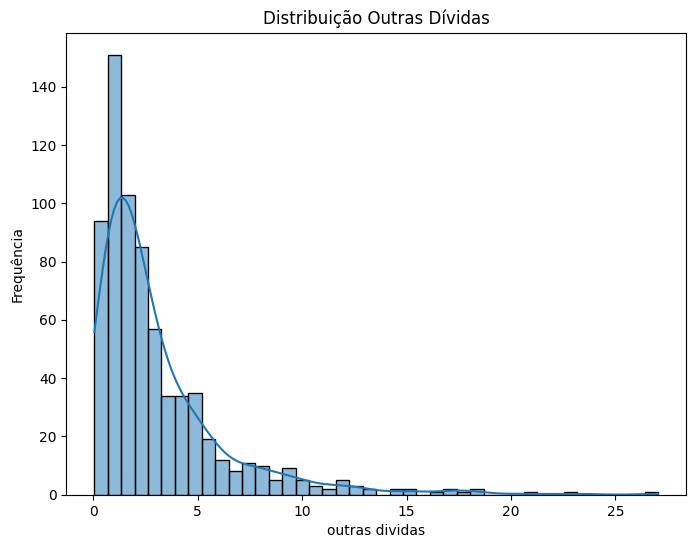

In [211]:
plt.figure(figsize=(8, 6))
sns.histplot(df['outras_dividas'], kde=True)
plt.title('Distribuição Outras Dívidas')
plt.xlabel('outras dividas')
plt.ylabel('Frequência')
plt.show()

## Boxplot

###Idades

O boxplot da idade mostra que a maioria dos solicitantes (50% centrais) tem entre 29 e 41 anos, com a idade mediana em 35 anos. A faixa principal de idades vai de 20 a 55 anos. Há um outlier significativo de aproximadamente 140 anos, indicando um provável erro de dados que precisa ser corrigido.

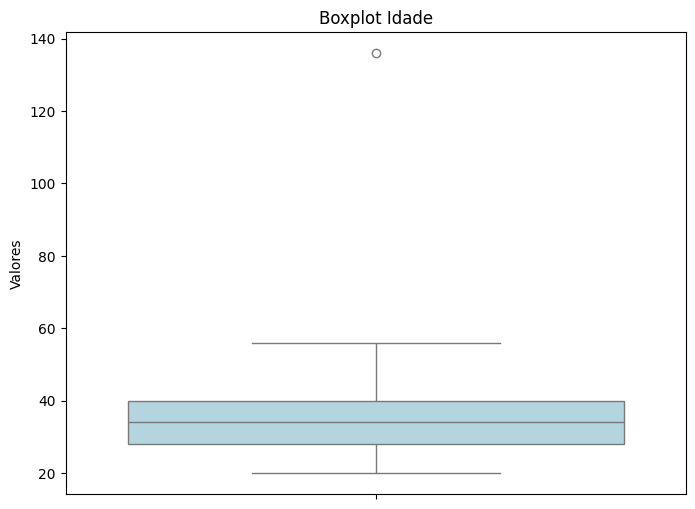

In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['idade'], color='lightblue')
plt.title('Boxplot Idade')
plt.ylabel('Valores')
plt.show()

###Escolaridade

O boxplot indica que a maioria dos solicitantes (50% centrais) possui Ensino Médio ou Graduação (níveis 1 e 2). A maior parte dos dados se limita até a Pós-graduação (nível 3). Existem poucos outliers que representam solicitantes com Doutorado ou níveis educacionais muito elevados (níveis 4 e 5).

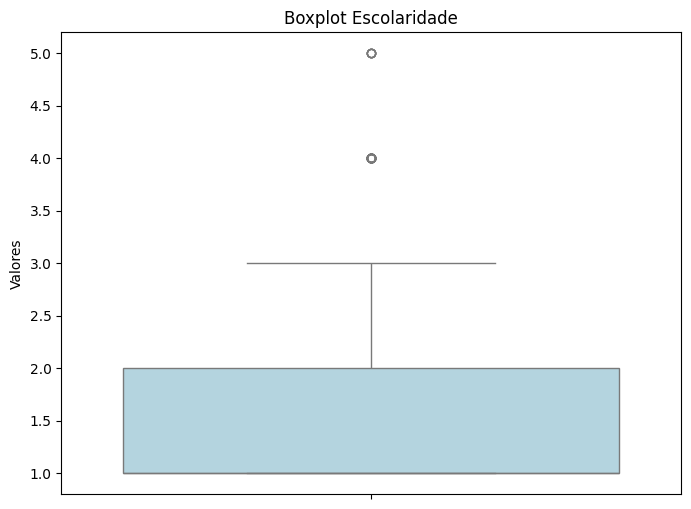

In [213]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['escolaridade'], color='lightblue')
plt.title('Boxplot Escolaridade')
plt.ylabel('Valores')
plt.show()

###Tempo Empregado

O boxplot do "tempo_empregado" mostra que a maioria dos solicitantes de empréstimo (50% centrais) possui entre 3 e 12 anos de tempo de emprego, com a mediana em 7 anos. Há uma presença significativa de solicitantes com pouco tempo de emprego (próximo de 0), e a maioria dos dados não ultrapassa 25 anos. Existem outliers que representam uma pequena porção de solicitantes com longos períodos de emprego (acima de 25 anos), indicando uma maior estabilidade profissional em comparação com a maioria.

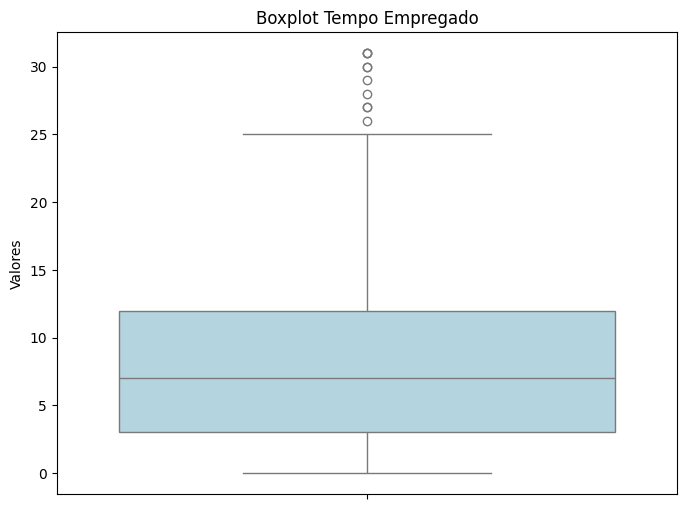

In [214]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tempo_empregado'], color='lightblue')
plt.title('Boxplot Tempo Empregado')
plt.ylabel('Valores')
plt.show()

###Tempo Residência

O boxplot do "tempo_residencia" indica que a maioria dos solicitantes (50% centrais) reside em seu endereço atual entre 3 e 12 anos, com a mediana em 7 anos. Há uma parcela de solicitantes com tempo de residência muito curto (próximo de 0), e a grande maioria dos dados está dentro de 25 anos. Existem outliers que representam uma minoria de solicitantes com períodos de residência muito longos (acima de 25 anos).

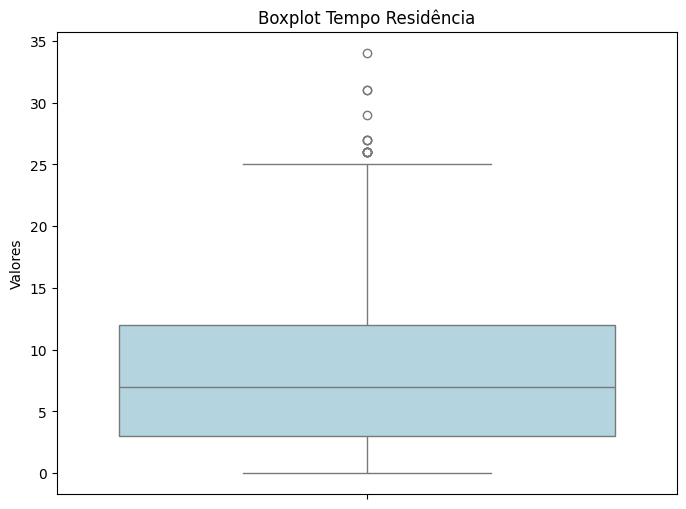

In [215]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tempo_residencia'], color='lightblue')
plt.title('Boxplot Tempo Residência')
plt.ylabel('Valores')
plt.show()

###Renda Anual

O boxplot da "renda_anual" revela que a maior parte dos solicitantes de empréstimo (50% centrais) possui uma renda anual entre 25 mil e 60 mil dólares, com a mediana em torno de 40-45 mil dólares. A maioria dos solicitantes tem renda de até 100 mil dólares. No entanto, existe uma cauda considerável de outliers que representam uma minoria de solicitantes com rendas anuais muito elevadas, ultrapassando os 100 mil dólares e chegando a mais de 450 mil dólares. Essa distribuição confirma a forte assimetria já observada no histograma, com a renda concentrada nas faixas mais baixas e poucos indivíduos nas faixas mais altas.

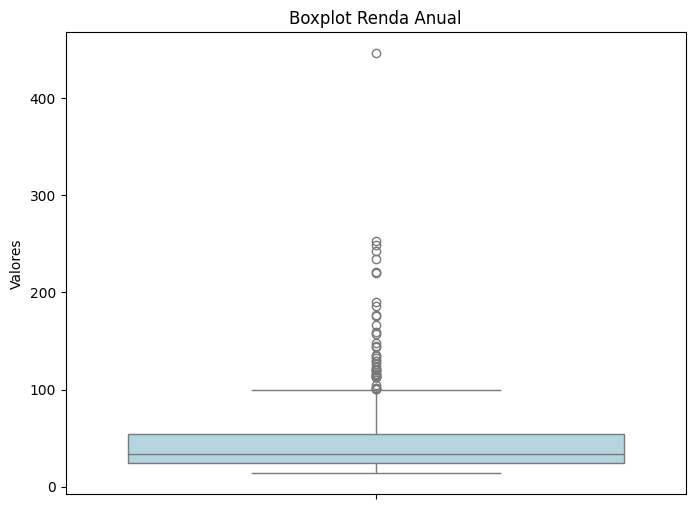

In [216]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['renda_anual'], color='lightblue')
plt.title('Boxplot Renda Anual')
plt.ylabel('Valores')
plt.show()

###Endividamento

O boxplot do "endividamento" revela que a maior parte dos solicitantes de empréstimo (50% centrais) possui uma razão de endividamento entre 4.5 e 14.5, com a mediana em torno de 8.5-9. Existe uma presença de solicitantes com endividamento muito baixo (próximo de zero). A maioria dos dados não ultrapassa o endividamento de 27.5. No entanto, há uma cauda considerável de outliers que representam uma minoria de solicitantes com razões de endividamento muito elevadas (acima de 27.5 e chegando a mais de 40). Essa distribuição confirma a assimetria observada no histograma, com o endividamento concentrado nas faixas mais baixas, mas com a presença de perfis de alto endividamento.

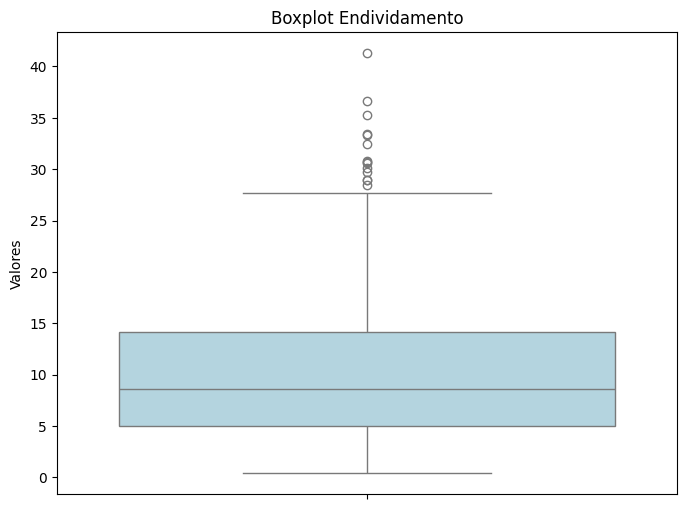

In [217]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['endividamento'], color='lightblue')
plt.title('Boxplot Endividamento')
plt.ylabel('Valores')
plt.show()

###Dívida Cartão

O boxplot da "divida_cartao" revela uma distribuição extremamente concentrada em valores baixos. A maioria dos solicitantes (50% centrais) tem uma dívida de cartão de crédito entre 0 e 1.5, com a mediana muito próxima de 0.5, e 25% deles têm dívida zero ou quase zero. Embora a maior parte dos dados esteja abaixo de 4, há uma quantidade substancial de outliers que representam solicitantes com dívidas de cartão de crédito significativamente mais elevadas (acima de 4 e chegando a mais de 20). Essa alta assimetria e a presença de muitos outliers de alto valor são características importantes para a análise de risco, pois, embora a maioria seja de baixo risco nesse quesito, uma minoria apresenta um endividamento considerável por cartão.

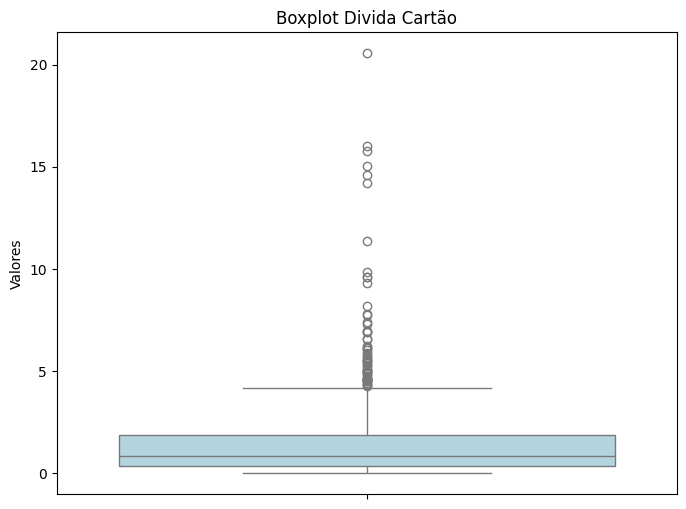

In [218]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['divida_cartao'], color='lightblue')
plt.title('Boxplot Divida Cartão')
plt.ylabel('Valores')
plt.show()

###Outras Dívidas

O boxplot da coluna "outras_dividas" revela uma distribuição extremamente concentrada em valores baixos. A maioria dos solicitantes (50% centrais) tem outras dívidas entre 0 e 4, com a mediana em torno de 1.5, e 25% deles têm dívida zero ou quase zero. Embora a maior parte dos dados esteja abaixo de 8, há uma quantidade substancial de outliers que representam solicitantes com outras dívidas significativamente mais elevadas (acima de 8 e chegando a mais de 25). Essa alta assimetria e a presença de muitos outliers de alto valor são características importantes para a análise de risco, pois, embora a maioria seja de baixo risco nesse quesito, uma minoria apresenta um endividamento considerável em outras dívidas.

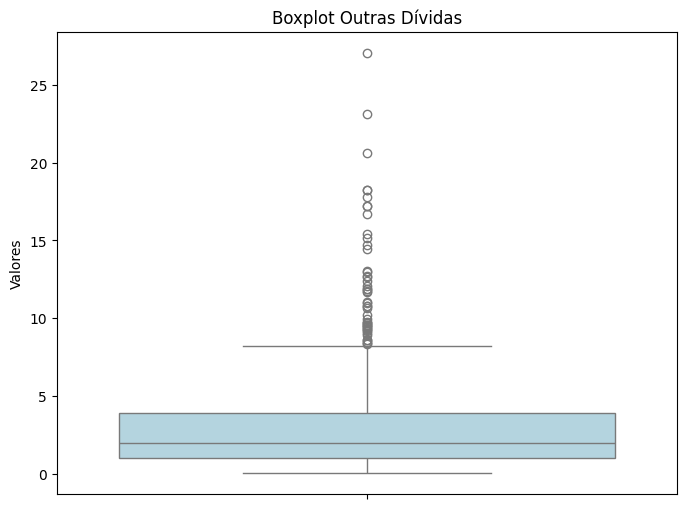

In [219]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['outras_dividas'], color='lightblue')
plt.title('Boxplot Outras Dívidas')
plt.ylabel('Valores')
plt.show()

## Matriz de Correlação
A matriz de correlação é uma ferramenta fundamental para entender relações entre variáveis, identificar padrões de comportamento e apoiar decisões estratégicas ou analíticas.

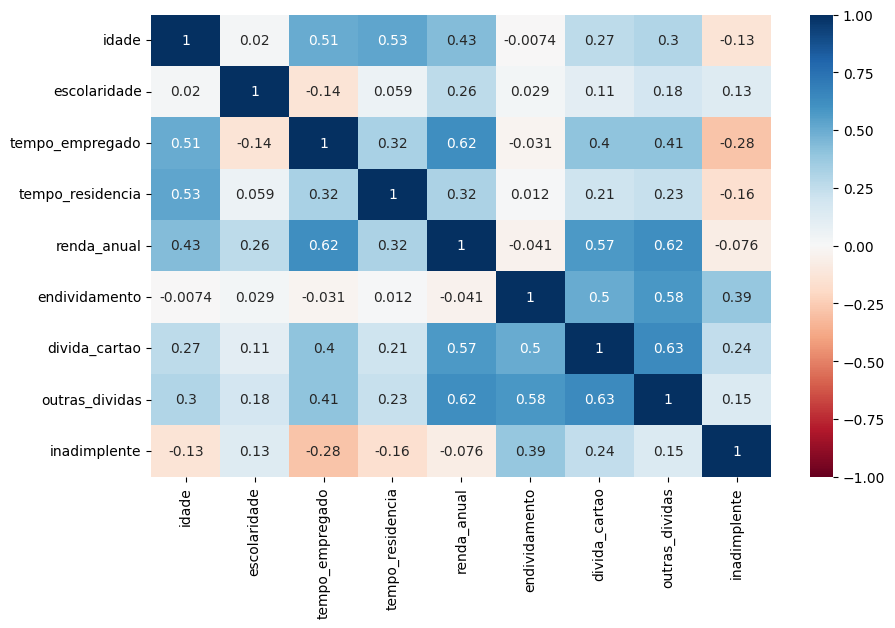

In [220]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')
plt.figure(figsize = (10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Inadimplência está associada a:

  * Menor tempo de emprego (-0.28)
  * Menor idade (-0.13)
  * Maior endividamento (0.39)


Pessoas mais jovens, com menos tempo de emprego e mais endividadas têm maior chance de inadimplência. Já quem tem maior renda costuma ter mais tempo de emprego e mais dívidas, mas não necessariamente inadimplência.

## Faixa Etária Inadimplentes

Analise das faixas etárias (20-29, 30-39, 40-49, 50-59 anos), e calculo da taxa de inadimplência de cada grupo exibindo um gráfico de barras para visualização. Identificação da faixa etária com o maior índice de inadimplência, a análise auxilia na identificação de padrões de risco por idade.

Proporção de inadimplentes por faixa etária:
faixa_etaria
20-29    0.373832
50-59    0.290323
30-39    0.217712
40-49    0.191358
Name: inadimplente, dtype: float64

A faixa etária com maior proporção de inadimplentes é 20-29 com 37.38%


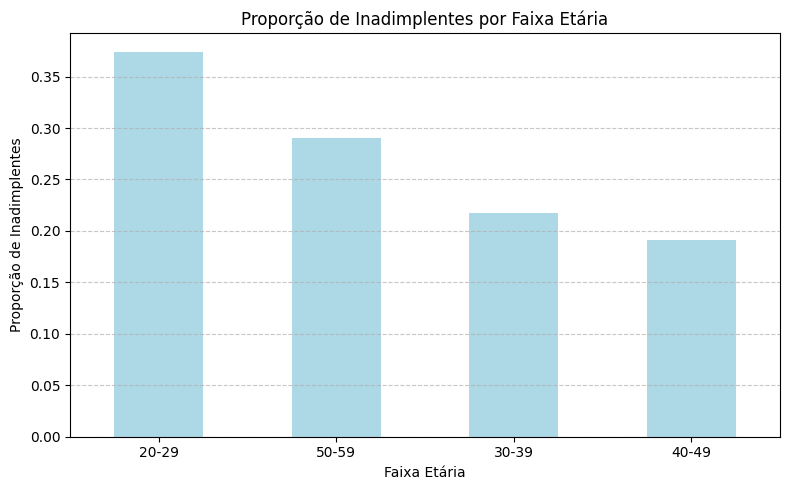

In [221]:
df_numeric.loc[:, 'faixa_etaria'] = pd.cut(df['idade'],
                                       bins=[20, 30, 40, 50, 60],
                                       labels=['20-29', '30-39', '40-49', '50-59'],
                                       right=False)

inadimplencia = df_numeric.groupby('faixa_etaria', observed=True)['inadimplente'].mean().sort_values(ascending=False)

print("Proporção de inadimplentes por faixa etária:")
print(inadimplencia)

faixa_maior_inadimplencia = inadimplencia.idxmax()
valor_maior_inadimplencia = inadimplencia.max()

print(f"\nA faixa etária com maior proporção de inadimplentes é {faixa_maior_inadimplencia} com {valor_maior_inadimplencia:.2%}")

plt.figure(figsize=(8, 5))
inadimplencia.plot(kind='bar', color='lightblue')
plt.title('Proporção de Inadimplentes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Inadimplentes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

##  Tratamento de valores inconsistentes


Padronização da coluna de inadimplência, transformando-a em valores numéricos binários através de três etapas:
1. Limpeza Inicial: Remove aspas simples dos valores textuais
2. Conversão Numérica: Transforma os dados em valores numéricos, convertendo registros inválidos em NaN
3. Tratamento Final: Substitui valores NaN por 0 (considerando-os como "não inadimplentes") e converte toda a coluna para inteiro

O resultado é uma coluna limpa e padronizada, pronta para ser utilizada em:
- Análises de risco
- Modelos preditivos
- Relatórios de desempenho financeiro


In [222]:
df['inadimplente'] = df['inadimplente'].astype(str).str.replace("'", "")

df['inadimplente'] = pd.to_numeric(df['inadimplente'], errors='coerce')

df['inadimplente'] = df['inadimplente'].fillna(0).astype(int)

print(df['inadimplente'].value_counts())

inadimplente
0    517
1    183
Name: count, dtype: int64


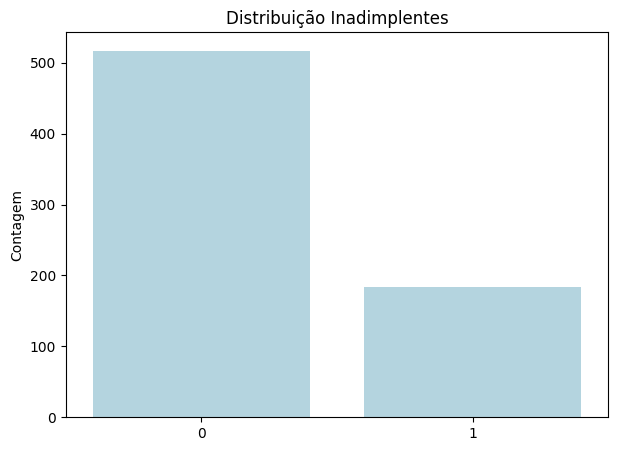

In [223]:
plt.figure(figsize=(7, 5))
sns.countplot(x='inadimplente', data=df, color='lightblue')
plt.title('Distribuição Inadimplentes')
plt.xlabel('')
plt.ylabel('Contagem')
plt.show()

## Tratamento de Valores Nulos

Visualização da Matriz de Nulidade:

Gera uma representação visual matricial usando ms.matrix() da biblioteca missingno, permitindo identificar padrões de dados faltantes remanescentes no dataset após o tratamento. A visualização mostra graficamente a distribuição dos valores existentes e faltantes.

<Axes: >

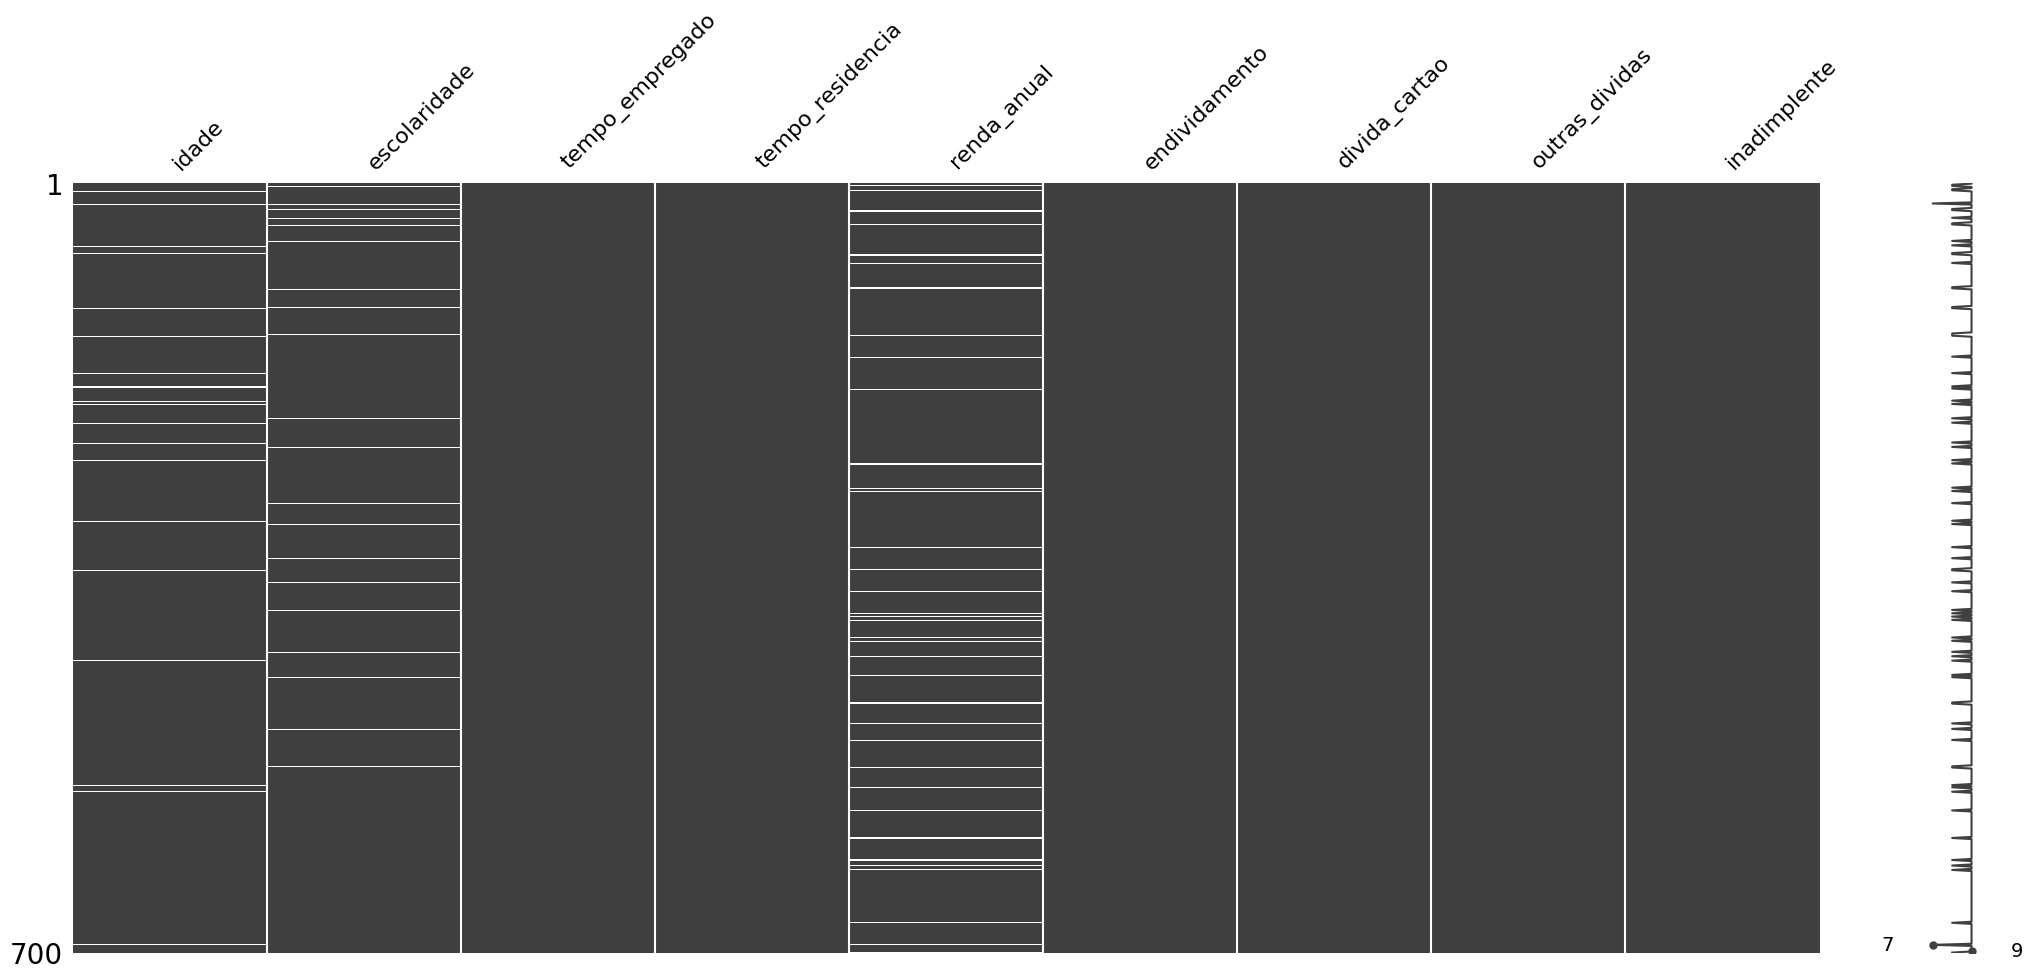

In [224]:
col = list(df.columns)
dfSemMissings = df[col[:]]

ms.matrix(dfSemMissings)

Realizei a substituição de dados ausentes nas colunas numéricas 'idade', 'escolaridade' e 'renda_anual' utilizando a mediana de cada coluna. Optei pela mediana por sua robustez contra valores extremos, preservando melhor a distribuição original dos dados.
O processo emprega o método fillna() combinado com median(), garantindo que:

•	O dataset se torne mais completo para análises estatísticas e modelagem

•	A estrutura original das variáveis seja mantida

•	Possíveis padrões nos dados faltantes sejam identificáveis

<Axes: >

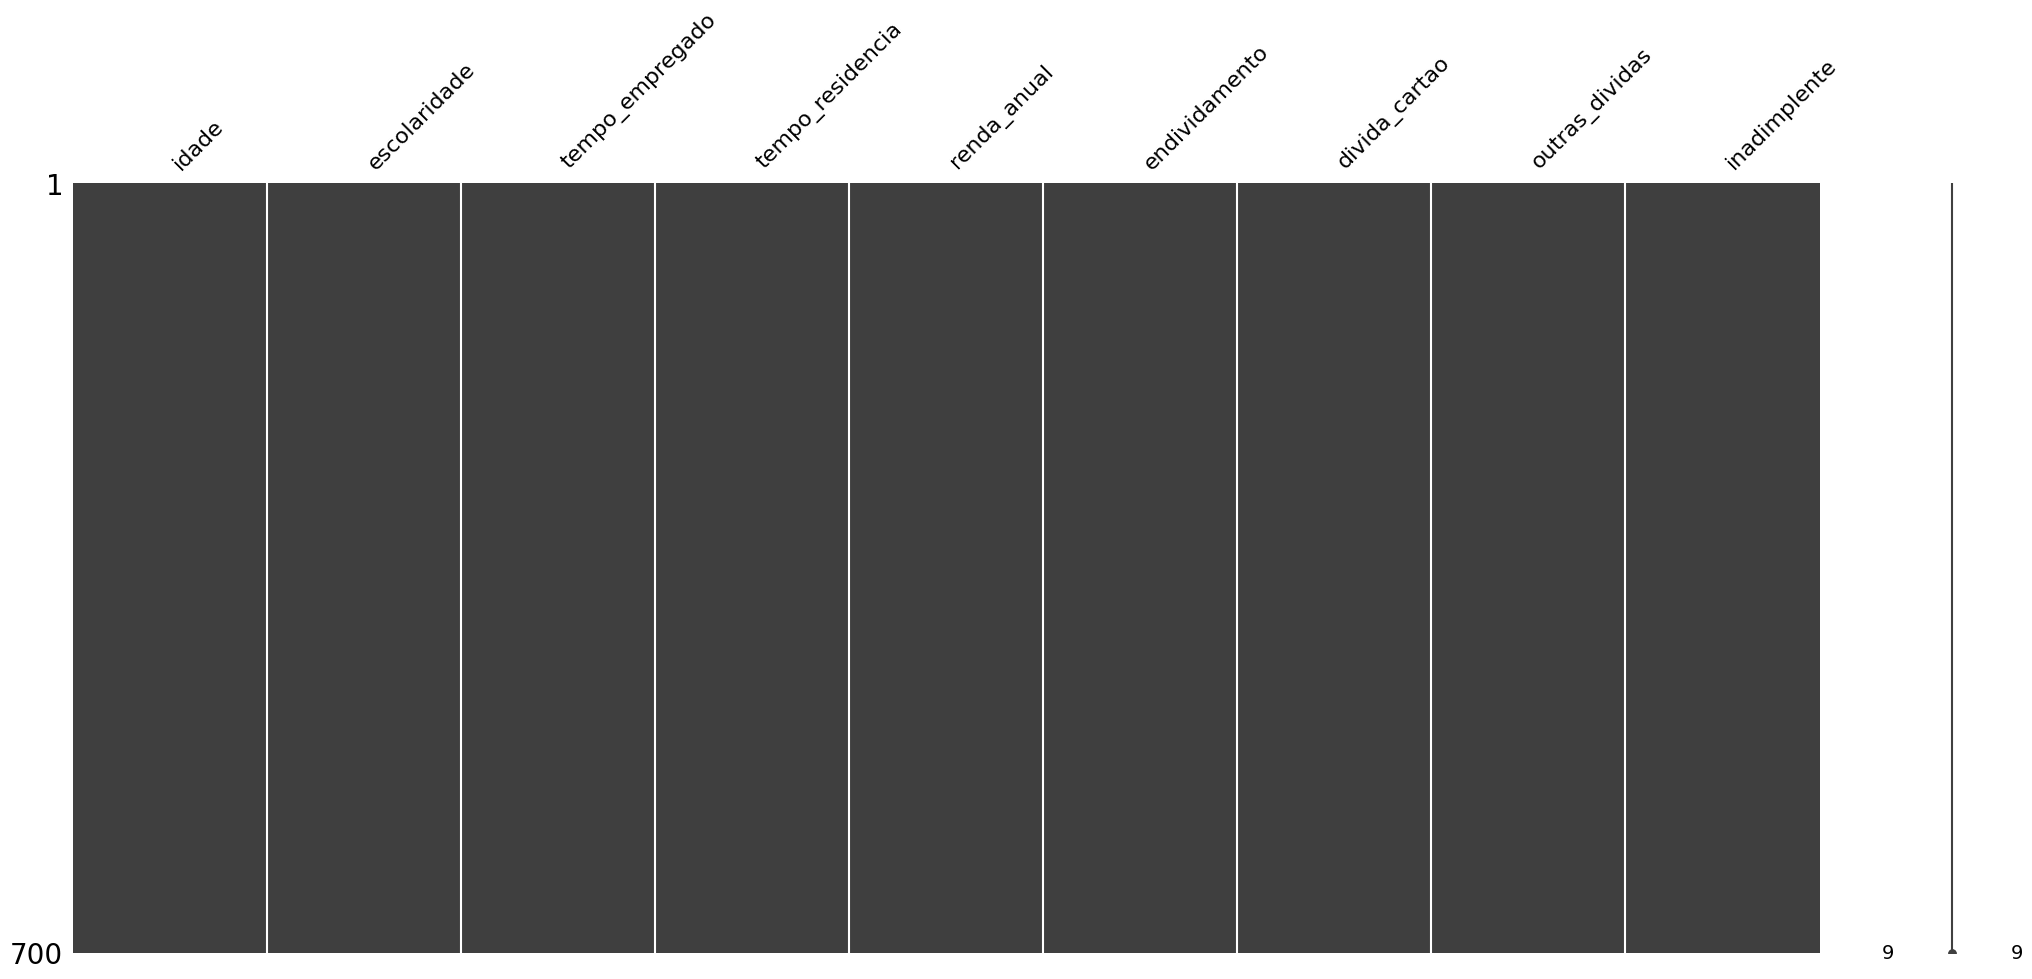

In [225]:
dfSemMissings['idade'] = dfSemMissings['idade'].fillna(dfSemMissings['idade'].median())
dfSemMissings['escolaridade'] = dfSemMissings['escolaridade'].fillna(dfSemMissings['escolaridade'].median())
dfSemMissings['renda_anual'] = dfSemMissings['renda_anual'].fillna(dfSemMissings['renda_anual'].median())

ms.matrix(dfSemMissings)

In [226]:
dfSemMissings.head(10)

idade  escolaridade  tempo_empregado  tempo_residencia  renda_anual  \
0   41.0           3.0               17                12        176.0   
1   27.0           1.0               10                 6         31.0   
2   40.0           1.0               15                 7         34.0   
3   41.0           1.0               15                14        120.0   
4   24.0           2.0                2                 0         28.0   
5   41.0           2.0                5                 5         25.0   
6   39.0           1.0               20                 9         34.0   
7   34.0           1.0               12                11         38.0   
8   24.0           1.0                3                 4         19.0   
9   36.0           1.0                0                13         25.0   

   endividamento  divida_cartao  outras_dividas  inadimplente  
0            9.3      11.359392        5.008608             1  
1           17.3       1.362202        4.000798             0  
2            5.5       0.856075        2.168925             0  
3            2.9       2.658720        0.821280             0  
4           17.3       1.787436        3.056564             1  
5           10.2       0.392700        2.157300             0  
6           30.6       3.833874       16.668126             0  
7            3.6       0.128592        1.239408             0  
8           24.4       1.358348        3.277652             1  
9           19.7       2.777700        2.147300             0

## Tratamento de Outliers

Implementei um processo para identificação e tratamento de outliers, seguindo estas etapas:

1. Detecção de Outliers  

*  Criada função detector_outliers() que verifica valores fora de limites pré-definidos  
* Aplicada a 8 variáveis numéricas críticas (idade, renda, dívidas, etc.)  
* Utilizei limites específicos para cada variável  

2. Consolidação dos Resultados
* Combinação lógica de todos os outliers detectados  
* Criação de máscara booleana para identificação completa de registros problemáticos  

3. Limpeza do Dataset
* Geração de novo Df (df_final) excluindo todos os registros com outliers  
* Preservação da qualidade estatística dos dados remanescentes  

Resultado Final: Dataset mais limpo e confiável, pronto para análises e modelagem, com valores dentro de faixas razoáveis pré-estabelecidas.


In [227]:
def detectar_outliers(df, coluna, lower_bound, upper_bound):
    print(f"{coluna}: Min {lower_bound} - Max {upper_bound}")
    return (df[coluna] < lower_bound) | (df[coluna] > upper_bound)

In [228]:
outliers_idade = detectar_outliers(dfSemMissings, 'idade', 20, 60)
outliers_escolaridade = detectar_outliers(dfSemMissings, 'escolaridade', 1, 4)
outliers_tempo_empregado = detectar_outliers(dfSemMissings, 'tempo_empregado', 0, 25)
outliers_tempo_residencia = detectar_outliers(dfSemMissings, 'tempo_residencia', 0, 25)
outliers_renda_anual = detectar_outliers(dfSemMissings, 'renda_anual', 14.00, 100.00)
outliers_endividamento = detectar_outliers(dfSemMissings, 'endividamento', 0.40, 28)
outliers_divida_cartao = detectar_outliers(dfSemMissings, 'divida_cartao', 0.010, 5.00)
outliers_outras_dividas = detectar_outliers(dfSemMissings, 'outras_dividas', 0.045584, 10.00)


outliers_total = (
    outliers_idade |
    outliers_escolaridade |
    outliers_tempo_empregado |
    outliers_tempo_residencia |
    outliers_renda_anual |
    outliers_endividamento |
    outliers_divida_cartao |
    outliers_outras_dividas
)

df_final = dfSemMissings[~outliers_total]

idade: Min 20 - Max 60
escolaridade: Min 1 - Max 4
tempo_empregado: Min 0 - Max 25
tempo_residencia: Min 0 - Max 25
renda_anual: Min 14.0 - Max 100.0
endividamento: Min 0.4 - Max 28
divida_cartao: Min 0.01 - Max 5.0
outras_dividas: Min 0.045584 - Max 10.0


In [229]:
df_final.describe()

idade  escolaridade  tempo_empregado  tempo_residencia  \
count  601.000000     601.00000       601.000000        601.000000   
mean    33.745424       1.62396         7.246256          7.525790   
std      7.484211       0.85539         5.657672          6.151673   
min     20.000000       1.00000         0.000000          0.000000   
25%     28.000000       1.00000         3.000000          2.000000   
50%     33.000000       1.00000         6.000000          6.000000   
75%     39.000000       2.00000        11.000000         11.000000   
max     56.000000       4.00000        25.000000         25.000000   

       renda_anual  endividamento  divida_cartao  outras_dividas  inadimplente  
count   601.000000     601.000000     601.000000      601.000000    601.000000  
mean     36.562396       9.432779       1.064162        2.289121      0.246256  
std      17.747860       5.783422       1.016625        1.877836      0.431188  
min      14.000000       0.400000       0.011696        0.045584      0.000000  
25%      23.000000       4.900000       0.321195        0.973152      0.000000  
50%      33.000000       8.200000       0.709308        1.721088      0.000000  
75%      44.000000      13.100000       1.505790        2.954160      0.000000  
max     100.000000      27.700000       4.960032        9.974640      1.000000

In [230]:
display(df_final)

idade  escolaridade  tempo_empregado  tempo_residencia  renda_anual  \
1     27.0           1.0               10                 6         31.0   
2     40.0           1.0               15                 7         34.0   
4     24.0           2.0                2                 0         28.0   
5     41.0           2.0                5                 5         25.0   
7     34.0           1.0               12                11         38.0   
..     ...           ...              ...               ...          ...   
695   36.0           2.0                6                15         27.0   
696   29.0           2.0                6                 4         21.0   
697   33.0           1.0               15                 3         32.0   
698   45.0           1.0               19                22         77.0   
699   37.0           1.0               12                14         34.0   

     endividamento  divida_cartao  outras_dividas  inadimplente  
1             17.3       1.362202        4.000798             0  
2              5.5       0.856075        2.168925             0  
4             17.3       1.787436        3.056564             1  
5             10.2       0.392700        2.157300             0  
7              3.6       0.128592        1.239408             0  
..             ...            ...             ...           ...  
695            4.6       0.262062        0.979938             1  
696           11.5       0.369495        2.045505             0  
697            7.6       0.491264        1.940736             0  
698            8.4       2.302608        4.165392             0  
699           14.7       2.994684        3.473316             0  

[601 rows x 9 columns]


Separação dos dados em variáveis preditoras (X) e target (y - inadimplência), dividindo-os em conjuntos de treino e teste. Essa divisão garante uma avaliação imparcial do modelo.


In [231]:
X = df_final.drop('inadimplente', axis=1)
y = df_final['inadimplente']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (480, 8)
Dimensões de X_test: (121, 8)
Dimensões de y_train: (480,)
Dimensões de y_test: (121,)


## Normalização

Optei por utilizar a normalização pois é uma técnica fundamental no pré-processamento de dados, especialmente em Machine Learning, pois ajusta as features para uma escala comum, entre 0 e 1 (ou -1 e 1). Essa padronização é essencial pois:
1. Evita Viés em Algoritmos Sensíveis à Escala  
   Alguns modelos, como KNN, SVM, Redes Neurais e métodos baseados em gradiente descendente (regressão linear, logística etc.), dependem de cálculos de distância ou otimização. Se uma variável tem valores muito maiores que outras (ex.: "Renda mensal" na casa dos milhares vs. "Idade" em dezenas), ela pode dominar o modelo, distorcendo os resultados. A normalização equaliza a influência de cada feature, garantindo um aprendizado justo.  
2. Facilita a Interpretação e Comparação entre Variáveis  
   Quando os dados estão na mesma escala, torna-se mais simples analisar a importância relativa de cada característica, seja em visualizações, coeficientes de modelos lineares ou análise exploratória.  

A normalização é uma etapa crítica para garantir que modelos de Machine Learning funcionem de maneira otimizada, especialmente quando as features têm escalas muito diferentes. Ela não só melhora a acurácia, mas também a robustez e a interpretabilidade dos resultados.


In [234]:
scaler_norm = MinMaxScaler()

In [235]:
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

In [236]:
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [237]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      idade  escolaridade  tempo_empregado  tempo_residencia  renda_anual  \
0  0.888889      0.000000             0.96              0.56     0.581395   
1  0.638889      0.333333             0.64              0.40     0.802326   
2  0.250000      0.000000             0.04              0.12     0.046512   
3  0.444444      0.333333             0.00              0.68     0.186047   
4  0.583333      0.000000             0.64              0.68     0.627907   

   endividamento  divida_cartao  outras_dividas  
0       0.379447       0.791762        0.244214  
1       0.146245       0.049902        0.312093  
2       0.996047       0.398062        0.259942  
3       0.367589       0.064089        0.255370  
4       0.197628       0.088169        0.320114  


Os histogramas após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

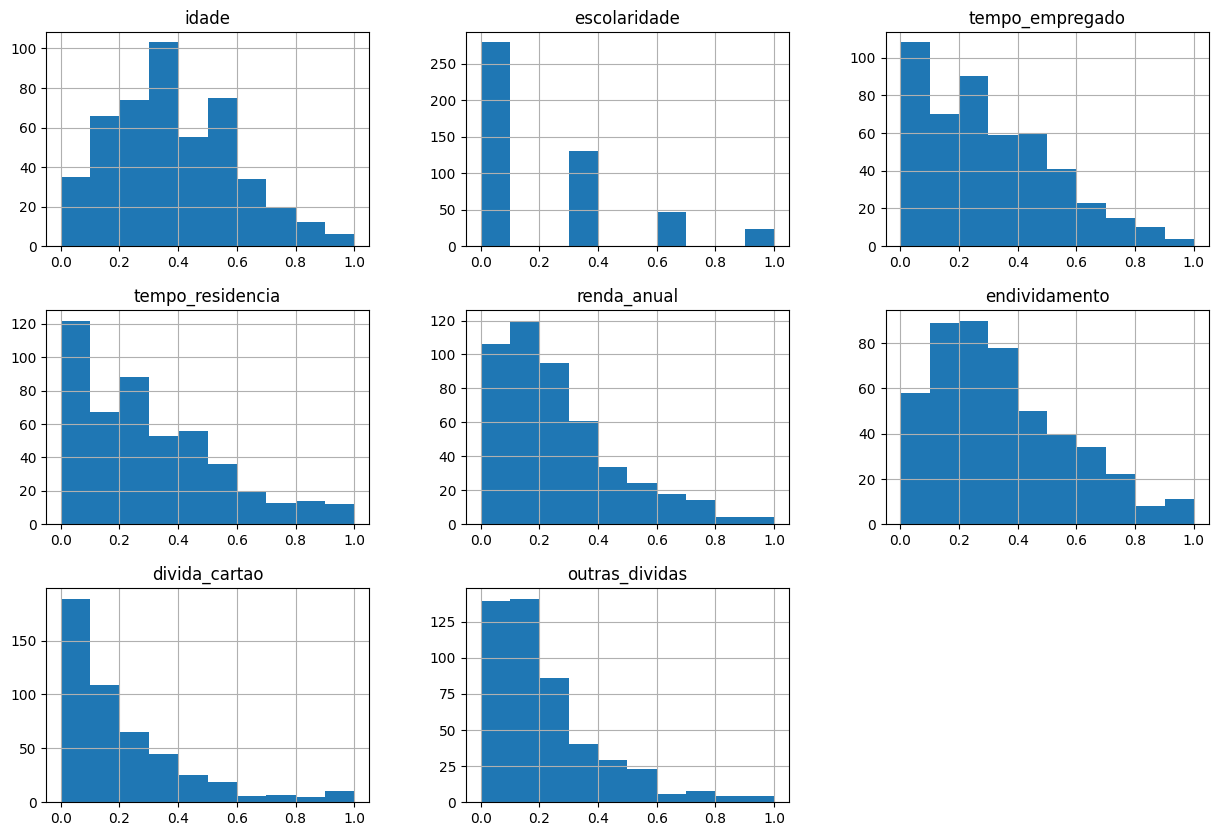

In [238]:
df_normalized.hist(figsize = (15,10))
plt.show()

Distribuição de densidade das variáveis.

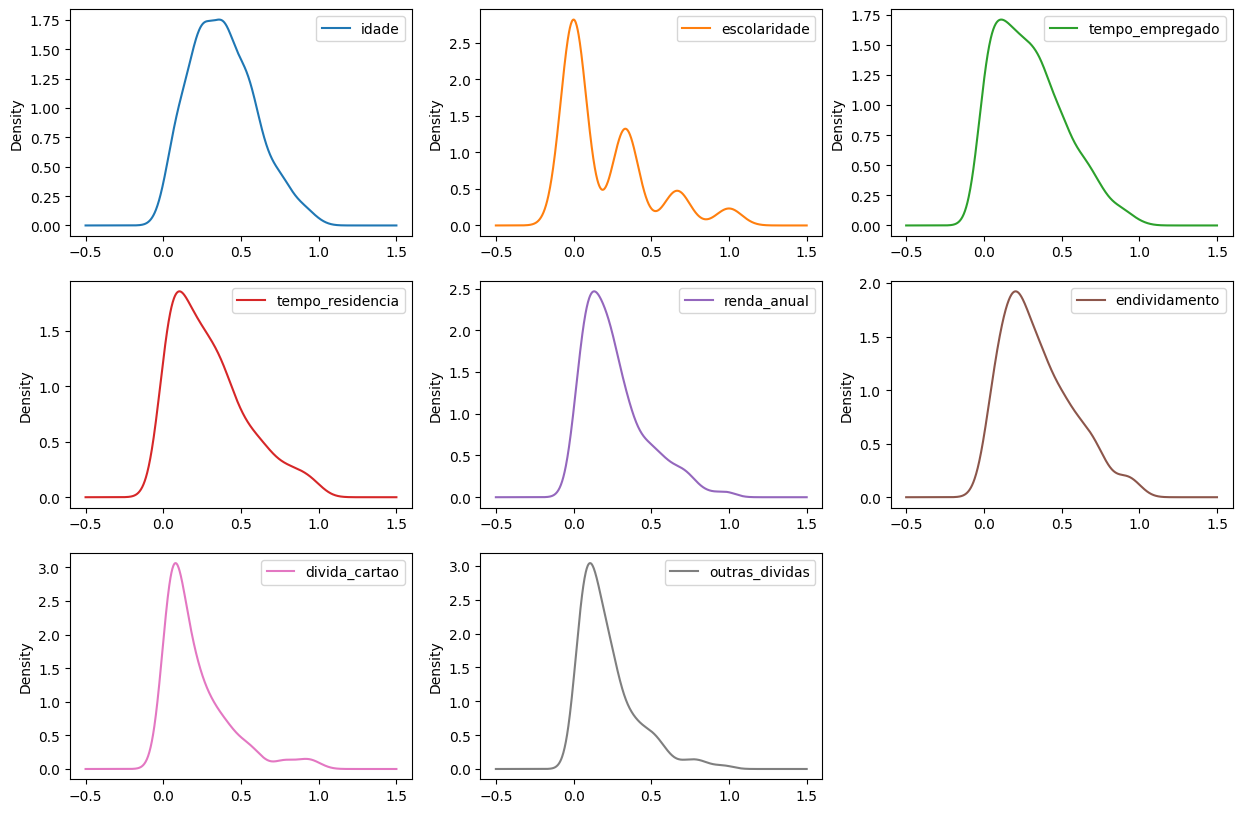

In [239]:
df_normalized.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

## Balancemanto Classes

Decidi realizar o balancemanto utilizando a técnica de undersampling pois o processo é fundamental em problemas de classificação onde há desbalanceamento entre as classes, como na previsão de inadimplência, em que geralmente há muito mais exemplos de clientes adimplentes do que inadimplentes.
O balanceamento da variável alvo é importante porque modelos de aprendizado de máquina tendem a favorecer a classe com maior número de amostras, o que pode gerar métricas enganosas, como alta acurácia, mas baixo desempenho na identificação da classe minoritária geralmente a mais relevante do ponto de vista do negócio.


In [240]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_normalized, y_train)

df_resampled = pd.DataFrame({'inadimplente': y_train_resampled})

print("Número de amostras após o undersampling:")
print(pd.Series(y_train_resampled).value_counts())

Número de amostras após o undersampling:
inadimplente
0    111
1    111
Name: count, dtype: int64


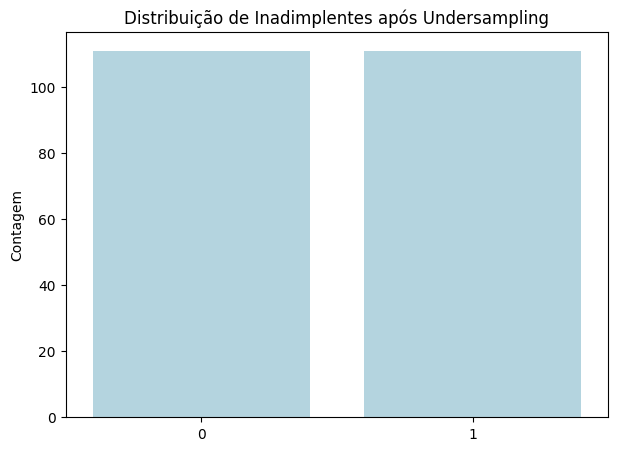

In [241]:
plt.figure(figsize=(7, 5))
sns.countplot(x='inadimplente', data=df_resampled, color='lightblue')
plt.title('Distribuição de Inadimplentes após Undersampling')
plt.xlabel('')
plt.ylabel('Contagem')
plt.show()

#Conclusão

A análise exploratória dos dados foi fundamental para compreender o conjunto de informações disponível. Esse processo me permitiu identificar etapas essenciais de limpeza e transformações necessárias, como o tratamento de valores ausentes, inconsistências e outliers. A partir dessas análises iniciais, foi possível obter insights relevantes sobre as informações contidas, comportamento das variáveis e a estrutura dos dados.
Visualizações como histogramas e boxplots desempenharam um papel importante na identificação da distribuição das variáveis, detecção de valores extremos (outliers) e compreensão da dispersão dos dados. Essas ferramentas me ajudaram a entender quais variáveis exigiam transformações e tratamentos específicos antes da modelagem. Além disso, a matriz de correlação foi essencial para analisar o grau de associação entre as variáveis numéricas.
Na etapa de pré-processamento, optei por aplicar a normalização dos dados. É uma etapa crítica para garantir que algoritmos de Machine Learning funcionem de maneira eficiente, especialmente quando as variáveis possuem escalas diferentes.

As três hipóteses levantadas foram validadas:

1.  **O nível de endividamento e a renda anual são os fatores mais preditivos de inadimplência?**

A análise dos dados demonstra que existe uma correlação positiva moderada entre a razão de endividamento e a inadimplência, indicando que, quanto maior o nível de endividamento de um indivíduo, maior a probabilidade de ele se tornar inadimplente. Essa constatação confirma a hipótese, já que o endividamento se mostra uma variável relevante para a predição de inadimplência.
A renda anual, por outro lado, apresenta uma correlação negativa, embora fraca, com a inadimplência. Isso sugere que indivíduos com rendas mais elevadas tendem a ser menos inadimplentes, o que faz sentido do ponto de vista econômico, mas a força dessa relação é limitada.
A hipótese é parcialmente confirmada. O nível de endividamento é de fato um dos fatores mais preditivos, enquanto a renda anual tem uma influência mais fraca. Ainda assim, ambas as variáveis devem ser consideradas na modelagem preditiva.

2.  **O conjunto de dados apresenta um desequilíbrio entre as classes "adimplente" e "inadimplente"?**

Sim, os dados confirmam um desequilíbrio acentuado entre as classes, com a maioria dos solicitantes classificados como adimplentes, enquanto os inadimplentes representam uma minoria significativa. Essa disparidade caracteriza um típico problema de class imbalance, bastante comum em contextos de risco de crédito.
Esse desequilíbrio pode comprometer o desempenho de modelos de machine learning, que tendem a favorecer a classe majoritária. Portanto, foi essencial aplicar técnicas específicas para tratar esse problema, garantindo que o modelo consiga identificar adequadamente os casos de inadimplência.


3. **Solicitantes mais jovens apresentam maior proporção de inadimplência do que os mais velhos?**

Sim, com base na análise da proporção de inadimplentes por faixa etária os dados mostram que:

- Faixa 20-29 anos: 37,88% de inadimplentes (maior taxa)  
- Faixa 50-59 anos: 29,82% de inadimplentes  
- Faixa 30-39 anos: 21,77% de inadimplentes  
- Faixa 40-49 anos: 19,19% de inadimplentes

Confirmando a hipótese de que a faixa etária dos mais jovem apresenta a maior proporção de inadimplência.

